[[369.17]
 [362.53]
 [359.  ]
 ...
 [120.6 ]
 [123.5 ]
 [123.6 ]]
3499 1500
Epoch 1/10
 - 9s - loss: 0.0125
Epoch 2/10
 - 9s - loss: 1.1319e-04
Epoch 3/10
 - 9s - loss: 1.0483e-04
Epoch 4/10
 - 9s - loss: 1.0152e-04
Epoch 5/10
 - 11s - loss: 1.0220e-04
Epoch 6/10
 - 11s - loss: 1.0259e-04
Epoch 7/10
 - 14s - loss: 1.0039e-04
Epoch 8/10
 - 10s - loss: 1.0067e-04
Epoch 9/10
 - 10s - loss: 9.8479e-05
Epoch 10/10
 - 10s - loss: 1.0074e-04
Train Score: 19.16 RMSE
Predict the Close value of final day: 144


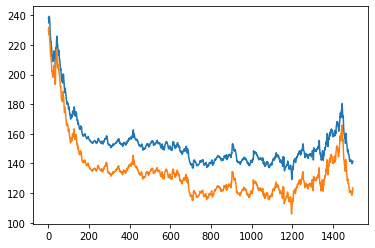

In [3]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
import FinanceDataReader as fdr

look_back = 1
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)
 
# file loader
#sydtpath = "D:sydt"
#naturalEndoTekCode = "A168330"
#fullpath = sydtpath + os.path.sep + naturalEndoTekCode + '.csv'
#pandf = pd.read_csv(fullpath, index_col="Date")
pandf = fdr.DataReader("KS11",2018)

# convert nparray
nparr = pandf['Close'].values[::-1].reshape(-1,1)
nparr.astype('float32')
print(nparr)
 
# normalization
scaler = MinMaxScaler(feature_range=(0, 1))
nptf = scaler.fit_transform(nparr)
 
# split train, test
train_size = int(len(nptf) * 0.7)
test_size = len(nptf) - train_size
train, test = nptf[0:train_size], nptf[train_size:len(nptf)]
print(len(train), len(test))
 
# create dataset for learning
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
 
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
 
# simple lstm network learning
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)
 
# make prediction
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Train Score: %.2f RMSE' % testScore)
 
# predict last value (or tomorrow?)
lastX = nptf[-1]
lastX = np.reshape(lastX, (1, 1, 1))
lastY = model.predict(lastX)
lastY = scaler.inverse_transform(lastY)
print('Predict the Close value of final day: %d' % lastY)  # 데이터 입력 마지막 다음날 종가 예측

%matplotlib inline
# plot
plt.plot(testPredict)
plt.plot(testY)
plt.show()

In [2]:
%matplot inline

UsageError: Line magic function `%matplot` not found.


In [7]:
a

,Close,Open,Volume
0,1000,800,10
1,2000,1200,20
2,3000,1600,30
